# Perovskite Data Set


*   Data from Materials Zone: https://www.materials.zone/
*   Notebook created by Yongtao Liu, April 18 2024



## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Download data

In [2]:
!gdown https://drive.google.com/uc?id=14j2Lwc2atHv8FNZx0jzyq4MVHa5uv-__

# Load the data from the CSV file
df = pd.read_csv("/content/Perovskite_database_content_all_data.csv")

# Print the DataFrame
print(df)


Downloading...
From: https://drive.google.com/uc?id=14j2Lwc2atHv8FNZx0jzyq4MVHa5uv-__
To: /content/Perovskite_database_content_all_data.csv
100% 86.7M/86.7M [00:00<00:00, 101MB/s]


<ipython-input-2-b458bff2e435>:4: DtypeWarning: Columns (10,17,19,22,23,27,29,31,32,35,36,40,44,45,46,48,51,54,65,66,67,68,69,71,73,74,84,85,86,89,90,93,98,99,100,105,108,113,115,118,122,123,124,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,193,194,224,225,255,271,272,273,277,278,304,314,315,321,322,325,326,330,331,335,336,338,342,348,352,355,369,370,371,373,374,376,380,384,387,390,393,403,404,405,406,407,408,409) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Perovskite_database_content_all_data.csv")


       Ref_ID  Ref_ID_temp Ref_name_of_person_entering_the_data  \
0           1            1                       Adam Hultqvist   
1           2            2                       Adam Hultqvist   
2           3            3                       Adam Hultqvist   
3           4            4                       Adam Hultqvist   
4           5            5                       Adam Hultqvist   
...       ...          ...                                  ...   
43247   43623           11                   Daniele T. Cuzzupè   
43248   43624           12                   Daniele T. Cuzzupè   
43249   43625           13                   Daniele T. Cuzzupè   
43250   10974        10974                      Gerrit Boschloo   
43251   33945        33945                            Weifei Fu   

       Ref_data_entered_by_author          Ref_DOI_number  Ref_lead_author  \
0                           False       10.1021/jp5126624     Sabba et al.   
1                           False      

In [3]:
# Avaliable properties

print(df.head(0))


Empty DataFrame
Columns: [Ref_ID, Ref_ID_temp, Ref_name_of_person_entering_the_data, Ref_data_entered_by_author, Ref_DOI_number, Ref_lead_author, Ref_publication_date, Ref_journal, Ref_part_of_initial_dataset, Ref_original_filename_data_upload, Ref_free_text_comment, Ref_internal_sample_id, Cell_stack_sequence, Cell_area_total, Cell_area_measured, Cell_number_of_cells_per_substrate, Cell_architecture, Cell_flexible, Cell_flexible_min_bending_radius, Cell_semitransparent, Cell_semitransparent_AVT, Cell_semitransparent_wavelength_range, Cell_semitransparent_raw_data, Module, Module_number_of_cells_in_module, Module_area_total, Module_area_effective, Module_JV_data_recalculated_per_cell, Substrate_stack_sequence, Substrate_thickness, Substrate_area, Substrate_supplier, Substrate_brand_name, Substrate_deposition_procedure, Substrate_surface_roughness_rms, Substrate_etching_procedure, Substrate_cleaning_procedure, ETL_stack_sequence, ETL_thickness, ETL_additives_compounds, ETL_additives_con

In [4]:
# read data from Stabilised_performance_PCE

stb_pce = df["Stabilised_performance_PCE"]
print(stb_pce)


0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
43247      NaN
43248      NaN
43249      NaN
43250      NaN
43251    11.04
Name: Stabilised_performance_PCE, Length: 43252, dtype: float64


In [5]:
# find data where stabilised peroformance pce is not nan
stb_pce_notnan = stb_pce[~stb_pce.isna()]
print(stb_pce_notnan)

15       12.00
16        9.00
128      16.40
180      17.42
181      17.42
         ...  
43176     5.50
43210    25.20
43216    18.36
43219    18.36
43251    11.04
Name: Stabilised_performance_PCE, Length: 3437, dtype: float64


In [25]:
# Reverse scan JV properties
r_voc = df['JV_reverse_scan_Voc']
r_jsc = df['JV_reverse_scan_Jsc']
r_ff = df['JV_reverse_scan_FF']
r_pce = df['JV_reverse_scan_PCE']
# Forward scan JV
f_pce = df['JV_forward_scan_PCE']
f_voc = df['JV_forward_scan_Voc']
f_jsc = df['JV_forward_scan_Jsc']
f_ff = df['JV_forward_scan_FF']

# Reverse scan properties where stb_pce avaliable
r_voc_stbpce = r_voc[~stb_pce.isna()]
r_jsc_stbpce = r_jsc[~stb_pce.isna()]
r_ff_stbpce = r_ff[~stb_pce.isna()]
r_pce_stbpce = r_pce[~stb_pce.isna()]

# Forward scan where stb_pce avaliable
f_voc_stbpce = f_voc[~stb_pce.isna()]
f_jsc_stbpce = f_jsc[~stb_pce.isna()]
f_ff_stbpce = f_ff[~stb_pce.isna()]
f_pce_stbpce = f_pce[~stb_pce.isna()]

# remove data where r_pce is nan
stb_pce_istn = stb_pce_notnan[~r_pce_stbpce.isna()]
r_pce_istn = r_pce_stbpce[~r_pce_stbpce.isna()]
r_jsc_istn = r_jsc_stbpce[~r_pce_stbpce.isna()]
r_ff_istn = r_ff_stbpce[~r_pce_stbpce.isna()]
r_voc_istn = r_voc_stbpce[~r_pce_stbpce.isna()]
f_voc_istn = f_voc_stbpce[~r_pce_stbpce.isna()]
f_jsc_istn = f_jsc_stbpce[~r_pce_stbpce.isna()]
f_ff_istn = f_ff_stbpce[~r_pce_stbpce.isna()]
f_pce_istn = f_pce_stbpce[~r_pce_stbpce.isna()]

# remove data where f_pce is nan
stb_pce_istnan = np.asarray(stb_pce_istn[~f_pce_istn.isna()])
f_pce_istnan = np.asarray(f_pce_istn[~f_pce_istn.isna()])
f_voc_istnan = np.asarray(f_voc_istn[~f_pce_istn.isna()])
f_jsc_istnan = np.asarray(f_jsc_istn[~f_pce_istn.isna()])
f_ff_istnan = np.asarray(f_ff_istn[~f_pce_istn.isna()])
r_pce_istnan = np.asarray(r_pce_istn[~f_pce_istn.isna()])
r_jsc_istnan = np.asarray(r_jsc_istn[~f_pce_istn.isna()])
r_ff_istnan = np.asarray(r_ff_istn[~f_pce_istn.isna()])
r_voc_istnan = np.asarray(r_voc_istn[~f_pce_istn.isna()])

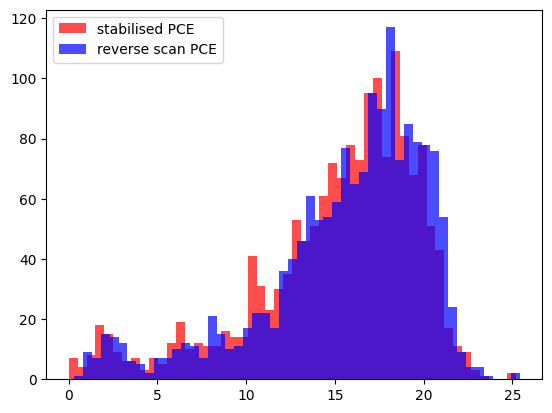

In [26]:
plt.hist(stb_pce_istnan, bins = 50, color = 'red', alpha = 0.7, label = 'stabilised PCE');
plt.hist(r_pce_istnan, bins = 50, color = 'blue', alpha = 0.7, label = 'reverse scan PCE');
plt.legend()
plt.show()

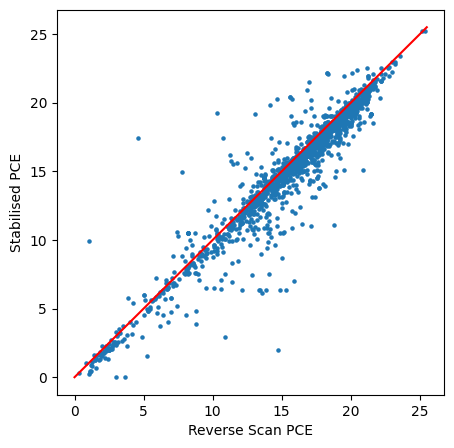

In [27]:
plt.figure(figsize=(5, 5))
plt.scatter(r_pce_istnan, stb_pce_istnan, s = 5)
plt.plot([0, 25.5], [0, 25.5], color='red')
plt.xlabel('Reverse Scan PCE')
plt.ylabel('Stabilised PCE')
plt.show()

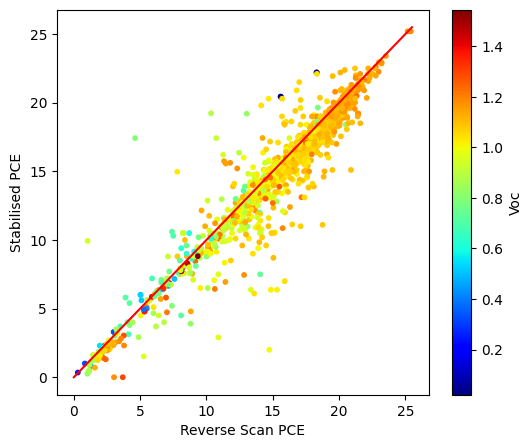

In [28]:
plt.figure(figsize=(6, 5))
plt.scatter(r_pce_istnan, stb_pce_istnan, s = 10, c = r_voc_istnan, cmap = 'jet')
plt.plot([0, 25.5], [0, 25.5], color='red')
plt.xlabel('Reverse Scan PCE')
plt.ylabel('Stabilised PCE')
plt.colorbar(label='Voc')
plt.show()

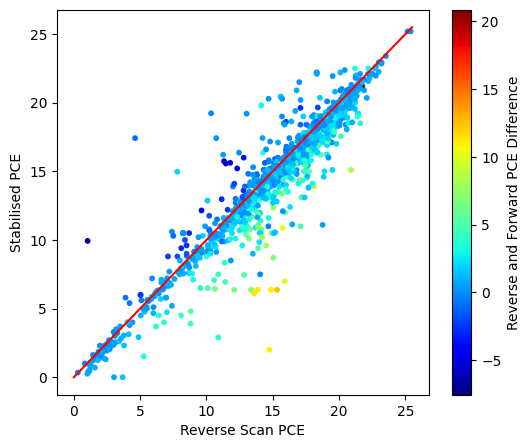

In [31]:
plt.figure(figsize=(6, 5))
plt.scatter(r_pce_istnan, stb_pce_istnan, s = 10, c = r_pce_istnan-f_pce_istnan, cmap = 'jet')
plt.plot([0, 25.5], [0, 25.5], color='red')
plt.xlabel('Reverse Scan PCE')
plt.ylabel('Stabilised PCE')
plt.colorbar(label='Reverse and Forward PCE Difference')
plt.show()

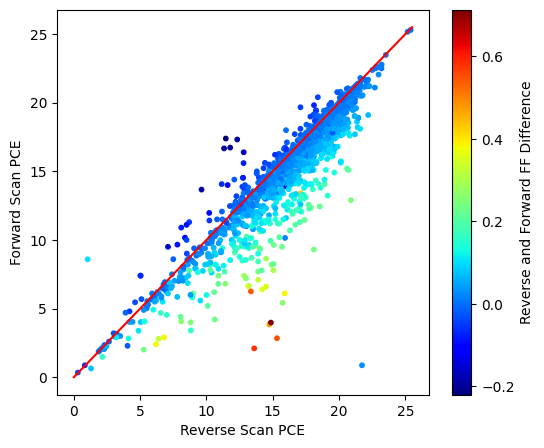

In [36]:
plt.figure(figsize=(6, 5))
plt.scatter(r_pce_istnan, f_pce_istnan, s = 10, c = r_ff_istnan-f_ff_istnan, cmap = 'jet')
plt.plot([0, 25.5], [0, 25.5], color='red')
plt.xlabel('Reverse Scan PCE')
plt.ylabel('Forward Scan PCE')
plt.colorbar(label='Reverse and Forward FF Difference')
plt.show()

In [37]:
over_r_pce = []
under_r_pce = []
equal_r_pce = []
for i in range (len(r_pce_istnan)):
    if r_pce_istnan[i] > stb_pce_istnan[i]:
        over_r_pce.append(r_pce_istnan[i])
    elif r_pce_istnan[i] < stb_pce_istnan[i]:
        under_r_pce.append(r_pce_istnan[i])
    else:
        equal_r_pce.append(r_pce_istnan[i])

over_r_pce = np.asarray(over_r_pce, dtype = np.int64)
under_r_pce = np.asarray(under_r_pce, dtype = np.int64)
equal_r_pce = np.asarray(equal_r_pce, dtype = np.int64)

print(len(over_r_pce))
print(len(under_r_pce))
print(len(equal_r_pce))

1275
295
41


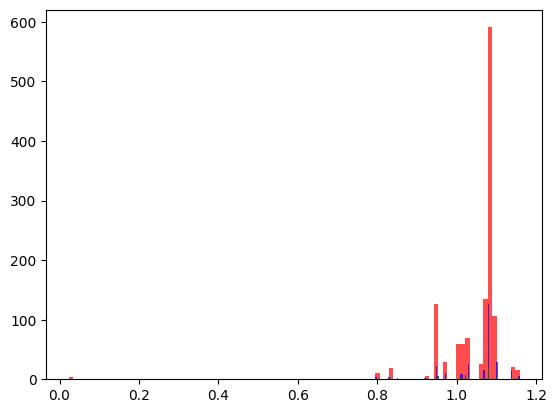

In [38]:
plt.hist(r_voc_istnan[over_r_pce], bins = 100, color = 'red', alpha = 0.7, label = 'over');
plt.hist(r_voc_istnan[under_r_pce], bins = 100, color = 'blue', alpha = 0.7, label = 'under');
plt.hist(r_voc_istnan[equal_r_pce], bins = 100, color = 'green', alpha = 0.7, label = 'equal');